# Compare data

In [1]:
import pandas as pd

## BMMS_Overview VS road_info

In [2]:
# import data
dir = '../infrastructure/original/'
filename = 'Roads_InfoAboutEachLRP.csv'
df_roadinfo = pd.read_csv(dir + filename)

In [3]:
# import data
dir = '../infrastructure/interpolated_by_teacher/'
filename = 'BMMS_overview.xlsx'
df_overview = pd.read_excel(dir + filename)

In [4]:
df_overview

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Z8806,83.728,Box Culvert,LRP083a,.,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183448,90.299962,interpolate
20411,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,.,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.519353,90.310063,interpolate
20412,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,interpolate
20413,Z8910,28.880,RCC Girder Bridge,LRP028a,Narainpur Bridge,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.880,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.510650,90.535314,interpolate


In [10]:
# Find rows that are in df_original but not in df_cleaned
diff_info_to_overview = pd.concat([df_roadinfo.lrp, df_overview.LRPName]).drop_duplicates(keep=False)

# Find rows that are in df_cleaned but not in df_original
diff_overview_to_info = pd.concat([df_overview.LRPName, df_roadinfo.lrp]).drop_duplicates(keep=False)


In [8]:
print("Rows in road_info but not in bridge_overview:")
print(diff_info_to_overview)

Rows in road_info but not in bridge_overview:
471      LRP204c
472      LRP204d
473      LRP204e
474      LRP204f
483      LRP207c
          ...   
15741    LRP031f
17750    LRP149f
19382    LRP449f
19401    LRP288b
19417    LRP098c
Length: 661, dtype: object


In [11]:
print("\nRows in bridge_overview but not in road_info:")
print(diff_overview_to_info)


Rows in bridge_overview but not in road_info:
138      LRP208d
142      LRP210d
169      LRP245b
176      LRP252c
190      LRP282c
          ...   
47244    LRP015i
48334    LRP022g
50981    LRP050e
51014    LRP063d
51015    LRP063e
Length: 661, dtype: object


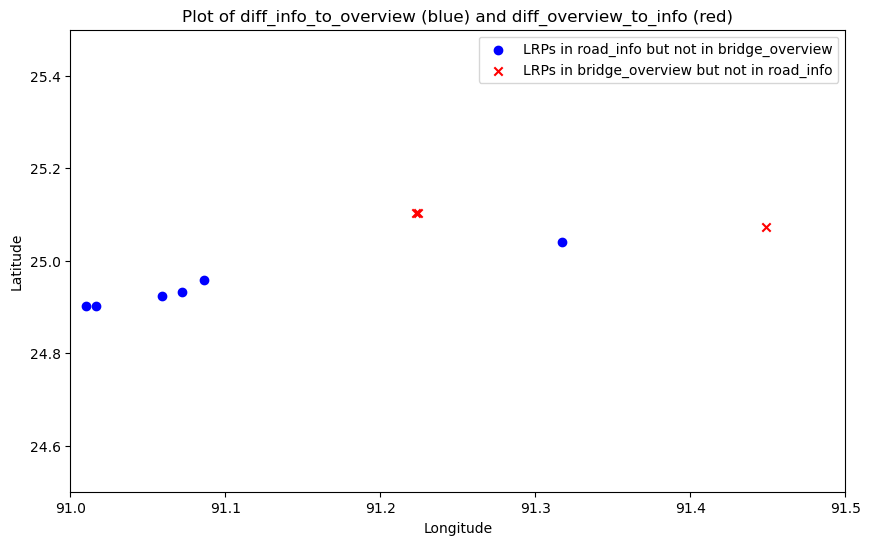

In [18]:
# plot the data (lat and lon) of diff_info_to_overview and diff_overview_to_info
import matplotlib.pyplot as plt

# Filter the rows in df_roadinfo that match diff_info_to_overview
filtered_info_to_overview = df_roadinfo[df_roadinfo['lrp'].isin(diff_info_to_overview)]

# Filter the rows in df_roadinfo that match diff_overview_to_info
filtered_overview_to_info = df_overview[df_overview['LRPName'].isin(diff_overview_to_info)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_info_to_overview['lon'], filtered_info_to_overview['lat'], c='blue', marker='o', label='LRPs in road_info but not in bridge_overview')
plt.scatter(filtered_overview_to_info['lon'], filtered_overview_to_info['lat'], c='red', marker='x', label='LRPs in bridge_overview but not in road_info')

'''# Annotate the points with LRP ID
for i, row in filtered_info_to_overview.iterrows():
    plt.annotate(row['lrp'], (row['lon'], row['lat']), fontsize=8, color='blue')
for i, row in filtered_overview_to_info.iterrows():
    plt.annotate(row['LRPName'], (row['lon'], row['lat']), fontsize=8, color='red')
'''

# set limit of the axis
plt.xlim(91, 91.5)
plt.ylim(24.5, 25.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of diff_info_to_overview (blue) and diff_overview_to_info (red)')
plt.legend()
plt.show()

## BMMS_Overview VS roads_transposed

In [20]:
# import roads_transposed.csv
dir = '../'
filename = 'roads_transposed.csv'
df_roadstransposed = pd.read_csv(dir + filename)

In [37]:
# Find rows that are in df_overview but not in df_roadstransposed
diff_overview_to_roadstransposed = pd.concat([df_overview[["road", "LRPName"]], df_roadstransposed[["road", "lrp"]]]).drop_duplicates(keep=False)
#diff_overview_to_roadstransposed = pd.concat([df_roadstransposed.lrp, df_overview.LRPName]).drop_duplicates(keep=False)

In [42]:
diff_overview_to_roadstransposed

,road,LRPName,lrp
0,N1,LRP001a,NaN
1,N1,LRP004b,NaN
3,N1,LRP010b,NaN
4,N1,LRP010c,NaN
5,N1,LRP011a,NaN
...,...,...,...
52205,Z8943,NaN,LRP007
52206,Z8943,NaN,LRP008
52207,Z8943,NaN,LRP008a
52208,Z8943,NaN,LRP008b


In [44]:
# export diff_overview_to_roadstransposed as csv
dir = '../'
filename = 'diff_overview_to_roadstransposed.csv'
diff_overview_to_roadstransposed.to_csv(dir + filename, index=False)

c:\Users\Move\anaconda3\envs\gds24\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


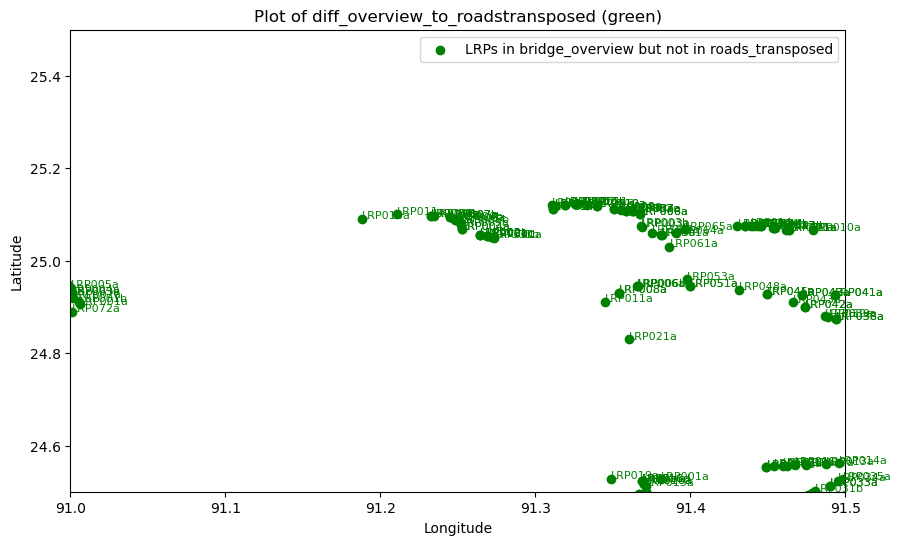

In [43]:
# Filter the rows in df_overview that match diff_overview_to_roadstransposed based on both road and LRPName
filtered_overview_to_roadstransposed = df_overview[df_overview[['road', 'LRPName']].apply(tuple, 1).isin(diff_overview_to_roadstransposed[['road', 'lrp']].apply(tuple, 1))]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_overview_to_roadstransposed['lon'], filtered_overview_to_roadstransposed['lat'], c='green', marker='o', label='LRPs in bridge_overview but not in roads_transposed')

# Annotate the points with LRP ID
for i, row in filtered_overview_to_roadstransposed.iterrows():
    plt.annotate(row['LRPName'], (row['lon'], row['lat']), fontsize=8, color='green')

# Set limit of the axis
plt.xlim(91, 91.5)
plt.ylim(24.5, 25.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of diff_overview_to_roadstransposed (green)')
plt.legend()
plt.show()


In [40]:
len(diff_overview_to_roadstransposed)

66161

In [34]:
diff_overview_to_roadstransposed

138      LRP208d
142      LRP210d
169      LRP245b
176      LRP252c
190      LRP282c
          ...   
47244    LRP015i
48334    LRP022g
50981    LRP050e
51014    LRP063d
51015    LRP063e
Length: 661, dtype: object